# 1D variable density modeling: Gaussian Mixture

Se pretende modelar la distribucion desconocida de una variable cualquiera como mezcla de distribuciones gausianas. Lo que importa es sobretodo intentar inferir aproximadamente cuantos posibles fenomenos independientes intervienen en la generacion de la variable en su totalidad.

Para ello se va a usar la implementacion en *Scikit Learn* de **Gaussian Mixture**.

> NOTA: Podria ser tambien interesante [sklearn.mixture.BayesianGaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn-mixture-bayesiangaussianmixture)


### References:

- [astroML - 1D Gaussian Mixture Example](https://www.astroml.org/book_figures/chapter4/fig_GMM_1D.html)
- [[Scikit-Learn Docs] sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)


In [41]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

### data creation

In [42]:
# Set up the dataset.
#  We'll create our dataset by drawing samples from Gaussians.

random_state = np.random.RandomState(seed=1)

X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)

### fit models and estimate metrics

In [54]:
# Learn the best-fit GaussianMixture models
#  Here we'll use scikit-learn's GaussianMixture model. The fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# maximum number of components to be estimated
max_num_comp = 10
# fit models with 1-"max_num_comp" components
N = np.arange(1, max_num_comp + 1)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
# - aic(X): Akaike information criterion for the current model on the input X.
# - bic(X): Bayesian information criterion for the current model on the input X.
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

# select the best model
M_best = models[np.argmin(AIC)]

In [55]:
# Number of components of the best model
print(f"Number of components of the best model: {np.argmin(AIC) + 1}")
# The mean of each mixture component.
print(f"Means of components of the best model: {M_best.means_.ravel()}")
# The weights of each mixture components.
print(f"Weights of components of the best model: {M_best.weights_.ravel()}")
# The covariance of each mixture component.
print(f"Covariances of components of the best model: {M_best.covariances_.ravel()}")

Number of components of the best model: 3
Means of components of the best model: [ 0.14281407  3.01943362 -1.48639243]
Weights of components of the best model: [0.57139616 0.15570257 0.27290127]
Covariances of components of the best model: [0.86160488 0.21236311 1.38401059]


### plot results

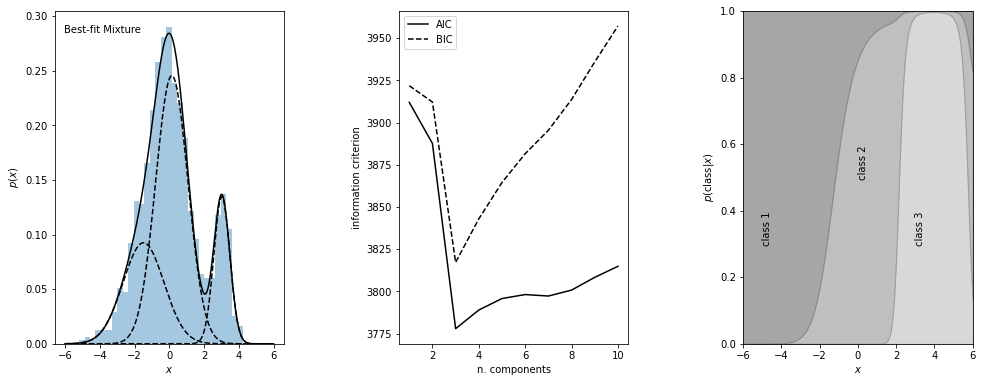

In [44]:
# Plot the results
#  We'll use three panels:
#   1) data + best-fit mixture
#   2) AIC and BIC vs number of components
#   3) probability that a point came from each component

fig = plt.figure(figsize=(15, 6.7))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)

x = np.linspace(-6, 6, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()